![Sem título.jpeg](<attachment:Sem título.jpeg>)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.
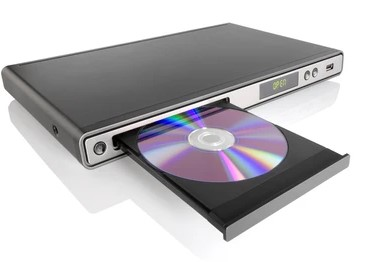

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingRegressor

rental= pd.read_csv("rental_info.csv")

In [ ]:
# Creating a column named "rental_lenght_car"
rental["rental_date"] = pd.to_datetime(rental["rental_date"])
rental["return_date"] = pd.to_datetime(rental["return_date"])

# Calcular diferença em dias
rental["rental_length_days"] = (rental["return_date"] - rental["rental_date"]).dt.days


In [ ]:
rental['special_features_clean'] = rental['special_features'].str.replace(r'[{}"]', '', regex=True)

rental['deleted_scenes'] = rental['special_features_clean'].str.contains('Deleted Scenes', na=False).astype(int)
rental['behind_the_scenes'] = rental['special_features_clean'].str.contains('Behind the Scenes', na=False).astype(int)


In [ ]:
# Spliting training and test data
X = rental.drop(["rental_length_days", "special_features", "rental_date", "return_date", "special_features_clean"], axis=1)
y = rental["rental_length_days"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=9)


In [ ]:
# Model
best_model = GradientBoostingRegressor(max_depth=1,
                                subsample=0.8,
                                max_features=0.2,
                                n_estimators=300,
                                random_state=9)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
best_mse = MSE(y_test, y_pred)
print(f"The best model is {best_model} and the best MSE is {best_mse}")